<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/rosa_ponto_DOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesse código vou trabalhar com os dados de saída do modelo SMC-Brasil.

Vou criar uma rosa dos ventos pra tabela de ponto DOW do modelo. 

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
dow = pd.DataFrame() # Crio um dataframe vazio
dow['direcoes'] = ['ESE', 'SE', 'SSE', 'S', 'SSW'] # criando a coluna das direções em string
dow['prob'] = [x/100 for x in [12.63, 37.03, 26.60, 18.33, 3.93]]
dow['hs50'] = [1.4293, 1.5809, 1.7408, 2.0328, 2.0838]
dow['hs90'] = [1.8970, 2.1980, 2.4529, 2.7807, 3.1293]
dow['hs99'] = [2.3462, 2.8254, 3.0603, 3.4895, 3.8752]
dow['hs12'] = [2.6898, 3.2587, 3.6362, 4.0186, 4.6204]
dow.rename(columns=str.upper, inplace=True) # colocando os nomes das colunas em maiúsculo
dow.index = dow[dow.columns[0]] # passando o index do dataframe pra primeira coluna (a de direções)
dow.drop(dow.columns[0], axis=1, inplace=True) # removendo a primeira coluna que sobrou "inplace"
dow.sort_values('PROB', ascending=False, inplace=True) # ordenando o dataframe pela coluna de probabilidade
dow

,PROB,HS50,HS90,HS99,HS12
DIRECOES,,,,,
SE,0.3703,1.5809,2.1980,2.8254,3.2587
SSE,0.2660,1.7408,2.4529,3.0603,3.6362
S,0.1833,2.0328,2.7807,3.4895,4.0186
ESE,0.1263,1.4293,1.8970,2.3462,2.6898
SSW,0.0393,2.0838,3.1293,3.8752,4.6204


In [7]:
max = 1000

se = {'direcao': ['SE','SSE','S','ESE','SSW'],
      'altura': [[np.linspace(0, dow.HS12[0], int(dow.PROB[0]*max),)],
                 [np.linspace(0, dow.HS12[1], int(dow.PROB[1]*max))],
                 [np.linspace(0, dow.HS12[2], int(dow.PROB[2]*max))],
                 [np.linspace(0, dow.HS12[3], int(dow.PROB[3]*max))],
                 [np.linspace(0, dow.HS12[4], int(dow.PROB[4]*max))]]}

Instalando o pacote windrose

In [9]:
!pip install windrose

Criando o plot

Fiz vários dataframes pra concatená-los depois e aplicar uma regra pra dar valores numéricos as direções.

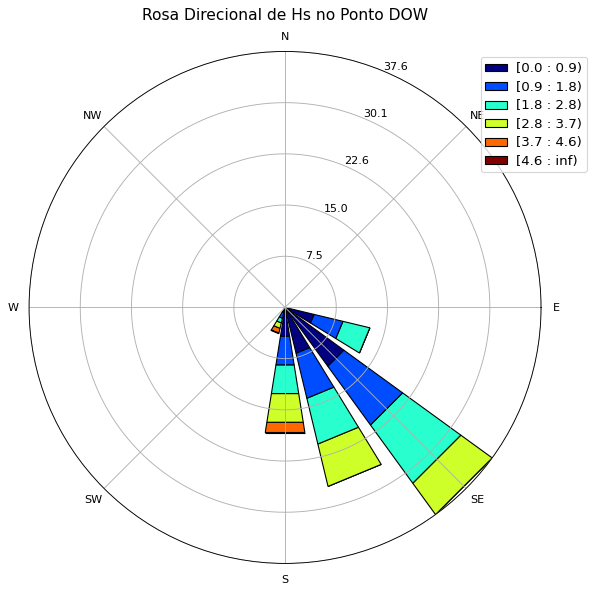

In [10]:
ondas0 = pd.DataFrame()
ondas0['direcoes'] = ['SE'] * int(dow.PROB[0]*max)
ondas0['altura'] = np.linspace(0, dow.HS12[0], int(dow.PROB[0]*max))

ondas1 = pd.DataFrame()
ondas1['direcoes'] = ['SSE'] * int(dow.PROB[1]*max)
ondas1['altura'] = np.linspace(0, dow.HS12[1], int(dow.PROB[1]*max))

ondas2 = pd.DataFrame()
ondas2['direcoes'] = ['S'] * int(dow.PROB[2]*max)
ondas2['altura'] = np.linspace(0, dow.HS12[2], int(dow.PROB[2]*max))

ondas3 = pd.DataFrame()
ondas3['direcoes'] = ['ESE'] * int(dow.PROB[3]*max)
ondas3['altura'] = np.linspace(0, dow.HS12[3], int(dow.PROB[3]*max))

ondas4 = pd.DataFrame()
ondas4['direcoes'] = ['SSW'] * int(dow.PROB[4]*max)
ondas4['altura'] = np.linspace(0, dow.HS12[4], int(dow.PROB[4]*max))

# concateno todos os dataframes
ondas = pd.concat([ondas0, ondas1, ondas2, ondas3, ondas4])
ondas

# crio uma regra pra dar valores numéricos de direção para os nomes
regra = {'SE': 180-45, 'SSE': 180-22.5, 'ESE': 135-22.5, 'S':180, 'SSW': 180+22.5}

# aplico a regra através da função map
ondas.direcoes = ondas.direcoes.map(regra)
ondas.direcoes

# fazendo a rosa de ondas
from windrose import WindroseAxes
new_labels = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
ax = WindroseAxes.from_ax(theta_labels=new_labels)
ax.bar(ondas.direcoes, ondas.altura,normed=True, opening=0.8, edgecolor='black')
lgd = ax.set_legend(title='Altura Significativa (Hs)',prop=dict(size=25))
plt.setp(lgd.get_texts(), fontsize=20) 
legend = plt.legend(bbox_to_anchor=[1.1, 1],loc='upper right', fancybox=True)
legend.get_title().set_fontsize('6')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')
plt.title('Rosa Direcional de Hs no Ponto DOW', fontsize=14)
plt.show()